In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### End of Distribution Imputation

In [47]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


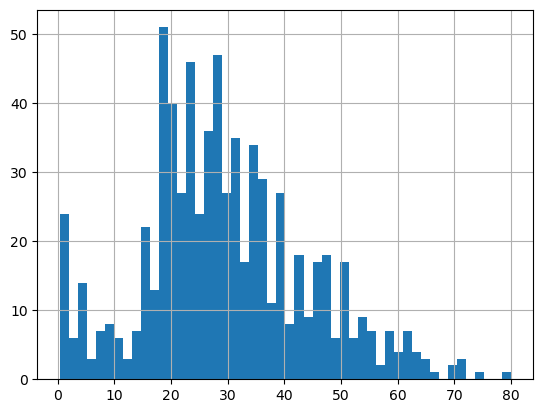

In [49]:
df.Age.hist(bins=50)
plt.show()

In [50]:
extreme =df.Age.mean()+3*df.Age.std()

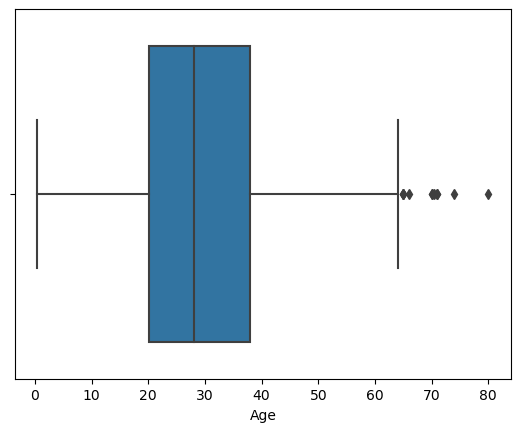

In [51]:
sns.boxplot(x='Age', data=df)
plt.show()

###### We are taking only right side values because it only has outlier is on the right side

In [52]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']= df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [53]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [54]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


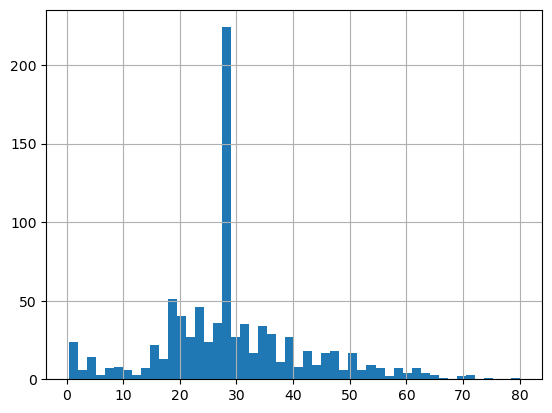

In [58]:
df['Age'].hist(bins=50)
plt.show()

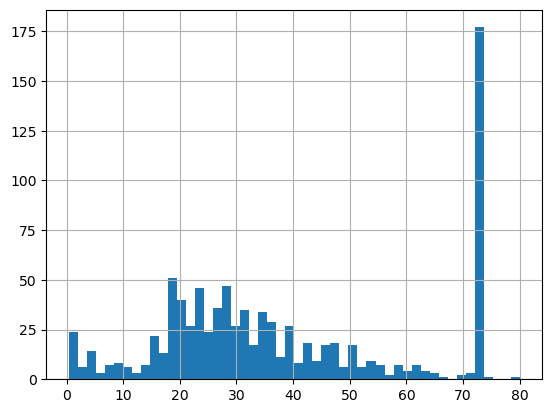

In [57]:
df['Age_end_distribution'].hist(bins=50)
plt.show()

<Axes: xlabel='Age_end_distribution'>

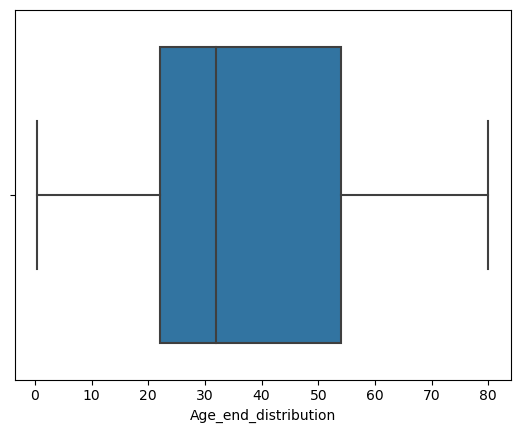

In [59]:
sns.boxplot(x= 'Age_end_distribution', data= df)

- Outliers have been captured by using the end of distribution imputation

In [ ]:
##### Advantages
- Easy to implement
- Capture the importnace of missingness if there is one

###### Disadvantages
- Distorts the original distribution of the variabel
- If missingness is not important, it may mask the predictive power of the original variable by distorting it distribution
- If the number of NAN is big, it will mask true outliers in the distribution
- If the number of NAN is small, the replaced NAN may be considered an outlier and pre-processed in subsequent steps of feature engineering